## 🎯 Goal of This Credit Card Dataset Project
*Predict whether a customer will default on their credit card payment next month.

In [1]:
# Basic libraries
import pandas as pd              # for data handling
import numpy as np               # for numerical operations

# Visualization (for EDA)
import matplotlib.pyplot as plt  # for plotting graphs
import seaborn as sns            # for better visualizations

# Data preprocessing
from sklearn.model_selection import train_test_split   # to split data
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer               # to handle missing values
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Machine Learning models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Model evaluation
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    classification_report,
    roc_auc_score
)
import warnings 
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv(r"C:\Users\mrasi\Downloads\credit_card.csv")

In [3]:
df.head()

,ID,LIMIT_BAL,GENDER,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
0,1,20000,2,2,1,24.0,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26.0,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34.0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37.0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57.0,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [4]:
df.shape

(30000, 25)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         30000 non-null  int64  
 1   LIMIT_BAL  30000 non-null  int64  
 2   GENDER     30000 non-null  int64  
 3   EDUCATION  30000 non-null  int64  
 4   MARRIAGE   30000 non-null  int64  
 5   AGE        29990 non-null  float64
 6   PAY_1      30000 non-null  int64  
 7   PAY_2      30000 non-null  int64  
 8   PAY_3      30000 non-null  int64  
 9   PAY_4      30000 non-null  int64  
 10  PAY_5      30000 non-null  int64  
 11  PAY_6      30000 non-null  int64  
 12  BILL_AMT1  30000 non-null  int64  
 13  BILL_AMT2  30000 non-null  int64  
 14  BILL_AMT3  30000 non-null  int64  
 15  BILL_AMT4  30000 non-null  int64  
 16  BILL_AMT5  30000 non-null  int64  
 17  BILL_AMT6  30000 non-null  int64  
 18  PAY_AMT1   30000 non-null  int64  
 19  PAY_AMT2   30000 non-null  int64  
 20  PAY_AM

In [6]:
df.describe()

,ID,LIMIT_BAL,GENDER,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,29990.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.487062,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.236845,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,-20.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,120.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


## DATA CLEANING

In [7]:
df.isnull().sum()

ID            0
LIMIT_BAL     0
GENDER        0
EDUCATION     0
MARRIAGE      0
AGE          10
PAY_1         0
PAY_2         0
PAY_3         0
PAY_4         0
PAY_5         0
PAY_6         0
BILL_AMT1     0
BILL_AMT2     0
BILL_AMT3     0
BILL_AMT4     0
BILL_AMT5     0
BILL_AMT6     0
PAY_AMT1      0
PAY_AMT2      0
PAY_AMT3      0
PAY_AMT4      0
PAY_AMT5      0
PAY_AMT6      0
DEFAULT       0
dtype: int64

In [8]:
df['AGE'].fillna(df['AGE'].median(), inplace=True)


In [9]:
df

,ID,LIMIT_BAL,GENDER,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
0,1,20000,2,2,1,24.0,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26.0,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34.0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37.0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57.0,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,1,3,1,39.0,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,29997,150000,1,3,2,43.0,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,29998,30000,1,2,2,37.0,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,29999,80000,1,3,1,41.0,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [10]:
df.isnull().sum()

ID           0
LIMIT_BAL    0
GENDER       0
EDUCATION    0
MARRIAGE     0
AGE          0
PAY_1        0
PAY_2        0
PAY_3        0
PAY_4        0
PAY_5        0
PAY_6        0
BILL_AMT1    0
BILL_AMT2    0
BILL_AMT3    0
BILL_AMT4    0
BILL_AMT5    0
BILL_AMT6    0
PAY_AMT1     0
PAY_AMT2     0
PAY_AMT3     0
PAY_AMT4     0
PAY_AMT5     0
PAY_AMT6     0
DEFAULT      0
dtype: int64

In [54]:
df['AGE'] = df['AGE'].astype(int)


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   ID         30000 non-null  int64
 1   LIMIT_BAL  30000 non-null  int64
 2   GENDER     30000 non-null  int64
 3   EDUCATION  30000 non-null  int64
 4   MARRIAGE   30000 non-null  int64
 5   AGE        30000 non-null  int64
 6   PAY_1      30000 non-null  int64
 7   PAY_2      30000 non-null  int64
 8   PAY_3      30000 non-null  int64
 9   PAY_4      30000 non-null  int64
 10  PAY_5      30000 non-null  int64
 11  PAY_6      30000 non-null  int64
 12  BILL_AMT1  30000 non-null  int64
 13  BILL_AMT2  30000 non-null  int64
 14  BILL_AMT3  30000 non-null  int64
 15  BILL_AMT4  30000 non-null  int64
 16  BILL_AMT5  30000 non-null  int64
 17  BILL_AMT6  30000 non-null  int64
 18  PAY_AMT1   30000 non-null  int64
 19  PAY_AMT2   30000 non-null  int64
 20  PAY_AMT3   30000 non-null  int64
 21  PAY_AMT4   3

In [13]:
df.drop("ID",axis=1,inplace=True)

In [14]:
df.head()

,LIMIT_BAL,GENDER,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [15]:
df['EDUCATION'].value_counts()


EDUCATION
2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: count, dtype: int64

In [16]:
df['EDUCATION'] = df['EDUCATION'].replace({0: 4, 5: 4, 6: 4})


In [17]:
df['EDUCATION'].value_counts()


EDUCATION
2    14030
1    10585
3     4917
4      468
Name: count, dtype: int64

In [18]:
df['MARRIAGE'].value_counts()


MARRIAGE
2    15964
1    13659
3      323
0       54
Name: count, dtype: int64

In [19]:
df['MARRIAGE'] = df['MARRIAGE'].replace(0, 3)


In [20]:
df['MARRIAGE'].value_counts()

MARRIAGE
2    15964
1    13659
3      377
Name: count, dtype: int64

In [55]:
bill_cols = ['BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6']
for col in bill_cols:
    df[col] = df[col].clip(lower=0)


In [22]:
(df[['BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6']] < 0).sum()


BILL_AMT1    0
BILL_AMT2    0
BILL_AMT3    0
BILL_AMT4    0
BILL_AMT5    0
BILL_AMT6    0
dtype: int64

## Separate features (X) and target (Y)

In [23]:
X = df.drop(columns=['DEFAULT'])
Y = df['DEFAULT']

## Encoding categorical variables

In [24]:
num_cols = [
    'LIMIT_BAL', 'AGE',
    'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6',
    'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',
    'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6'
]

cat_cols = ['GENDER', 'EDUCATION', 'MARRIAGE']

In [25]:
X = pd.get_dummies(X, columns=['GENDER', 'EDUCATION', 'MARRIAGE'], drop_first=True)

In [26]:
df.head()

,LIMIT_BAL,GENDER,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


## VISULIZATION

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

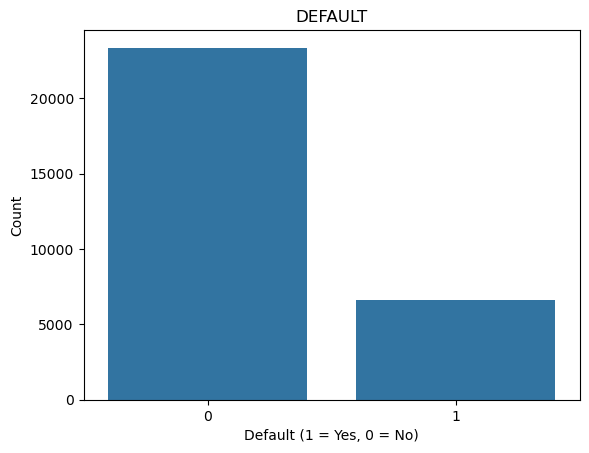

In [28]:
sns.countplot(x=Y)
plt.title("DEFAULT")
plt.xlabel("Default (1 = Yes, 0 = No)")
plt.ylabel("Count")
plt.show()


* this is imbalanced

In [29]:
from imblearn.over_sampling import SMOTE

# create SMOTE object
smote = SMOTE(random_state=42)

# fit and resample
X_res, Y_res = smote.fit_resample(X, Y)

print("Before SMOTE:", Y.value_counts())
print("After SMOTE:", Y_res.value_counts())


Before SMOTE: DEFAULT
0    23364
1     6636
Name: count, dtype: int64
After SMOTE: DEFAULT
1    23364
0    23364
Name: count, dtype: int64


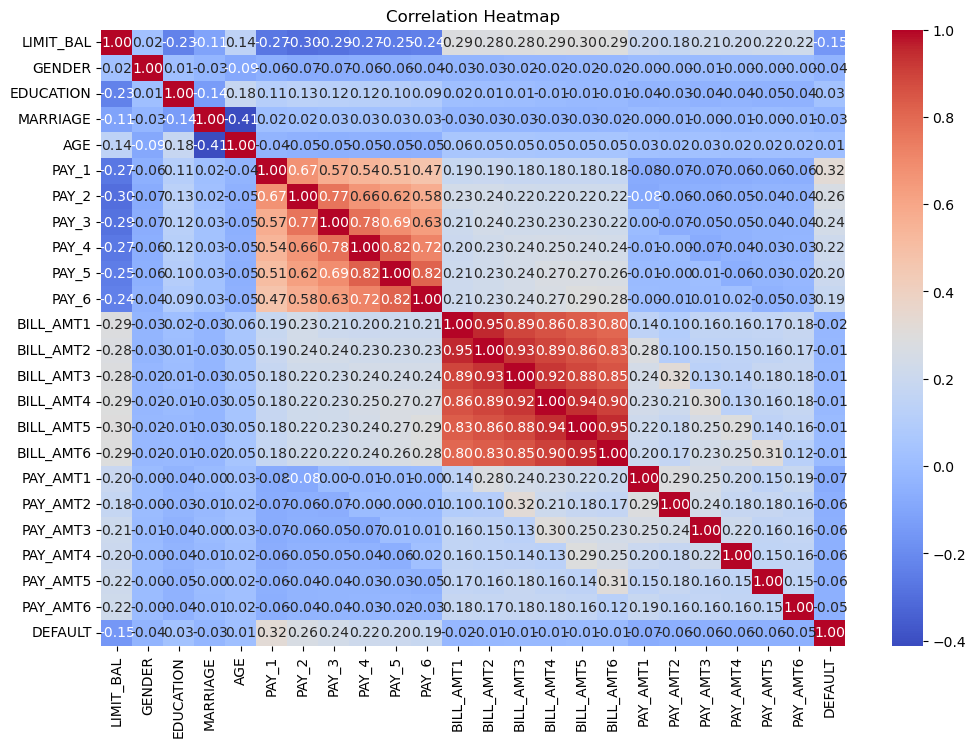

In [30]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(numeric_only=True), annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


In [31]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

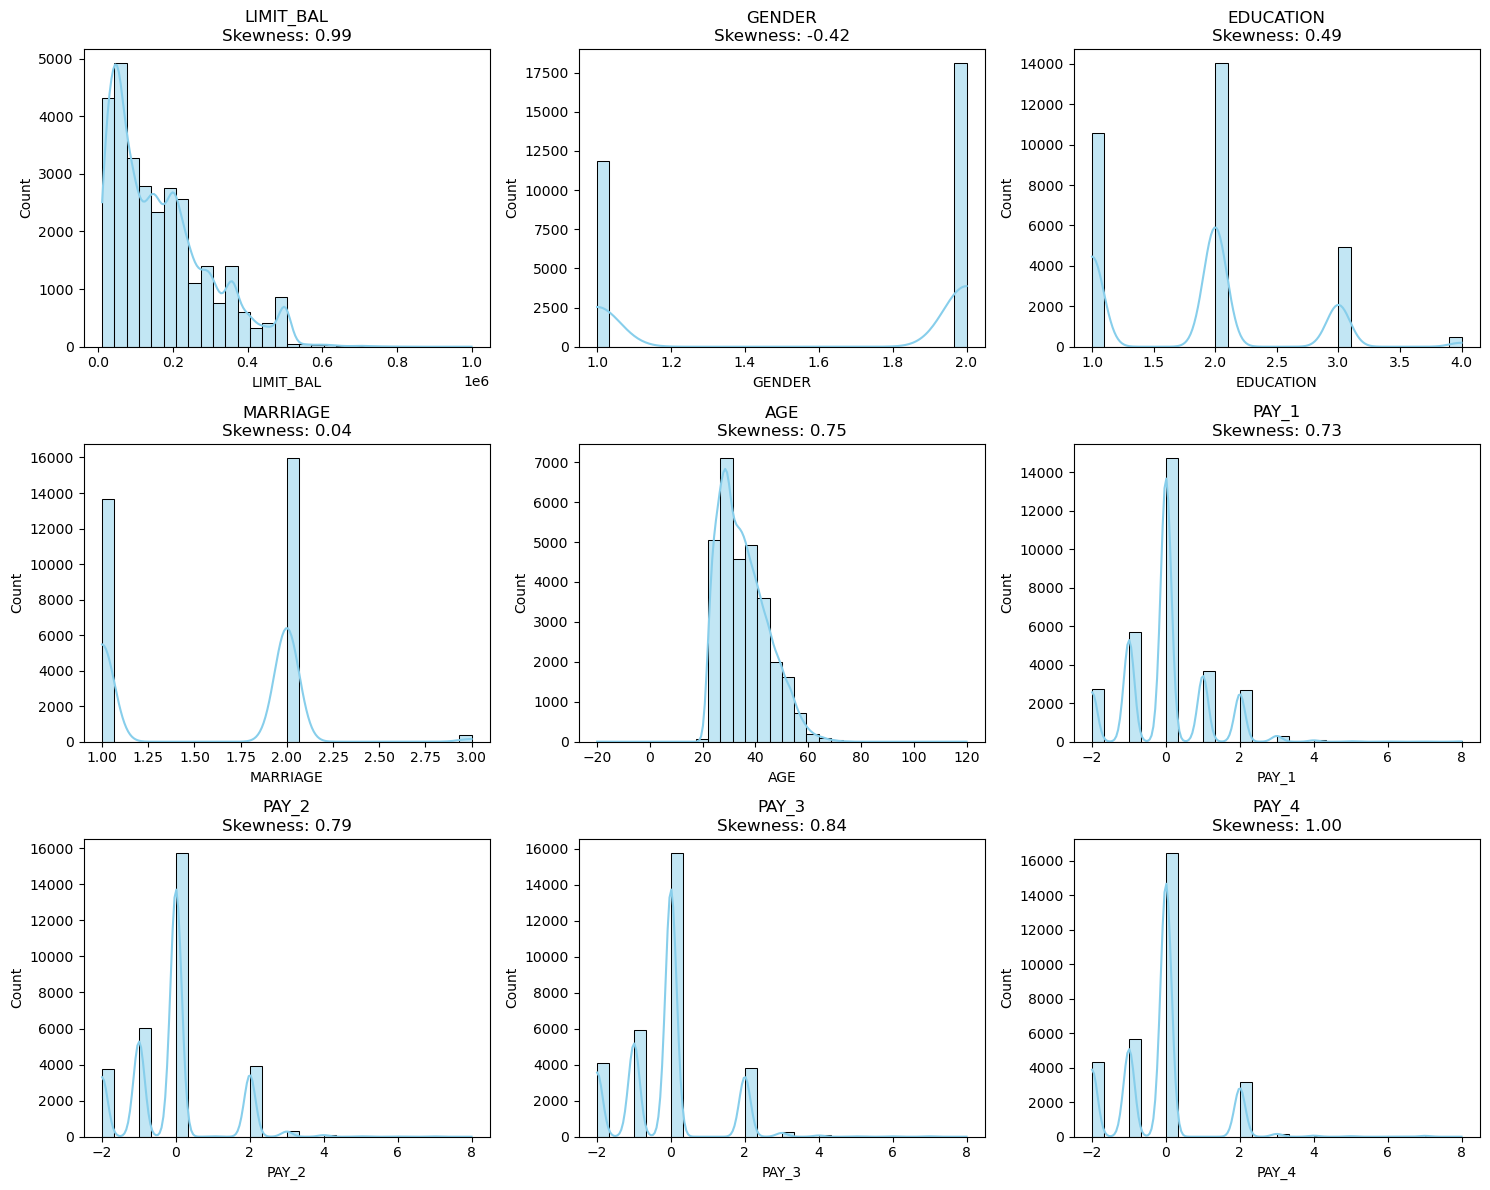

In [32]:
plt.figure(figsize=(15, 12))
for i, col in enumerate(numeric_cols[:9]):  # Adjust 9 → total numeric cols if needed
    plt.subplot(3, 3, i+1)
    sns.histplot(df[col], kde=True, bins=30, color='skyblue')
    plt.title(f'{col}\nSkewness: {df[col].skew():.2f}')
plt.tight_layout()
plt.show()

In [33]:
# Make a copy to keep original data safe
df_log = df.copy()

# Apply log1p (log(1 + x)) only on numeric columns, excluding target
for col in numeric_cols:
    if col != 'DEFAULT' and df[col].skew() > 0.5:
        df_log[col] = np.log1p(df[col])
        print(f"✅ Log transformation applied on: {col}")


✅ Log transformation applied on: LIMIT_BAL
✅ Log transformation applied on: AGE
✅ Log transformation applied on: PAY_1
✅ Log transformation applied on: PAY_2
✅ Log transformation applied on: PAY_3
✅ Log transformation applied on: PAY_4
✅ Log transformation applied on: PAY_5
✅ Log transformation applied on: PAY_6
✅ Log transformation applied on: BILL_AMT1
✅ Log transformation applied on: BILL_AMT2
✅ Log transformation applied on: BILL_AMT3
✅ Log transformation applied on: BILL_AMT4
✅ Log transformation applied on: BILL_AMT5
✅ Log transformation applied on: BILL_AMT6
✅ Log transformation applied on: PAY_AMT1
✅ Log transformation applied on: PAY_AMT2
✅ Log transformation applied on: PAY_AMT3
✅ Log transformation applied on: PAY_AMT4
✅ Log transformation applied on: PAY_AMT5
✅ Log transformation applied on: PAY_AMT6


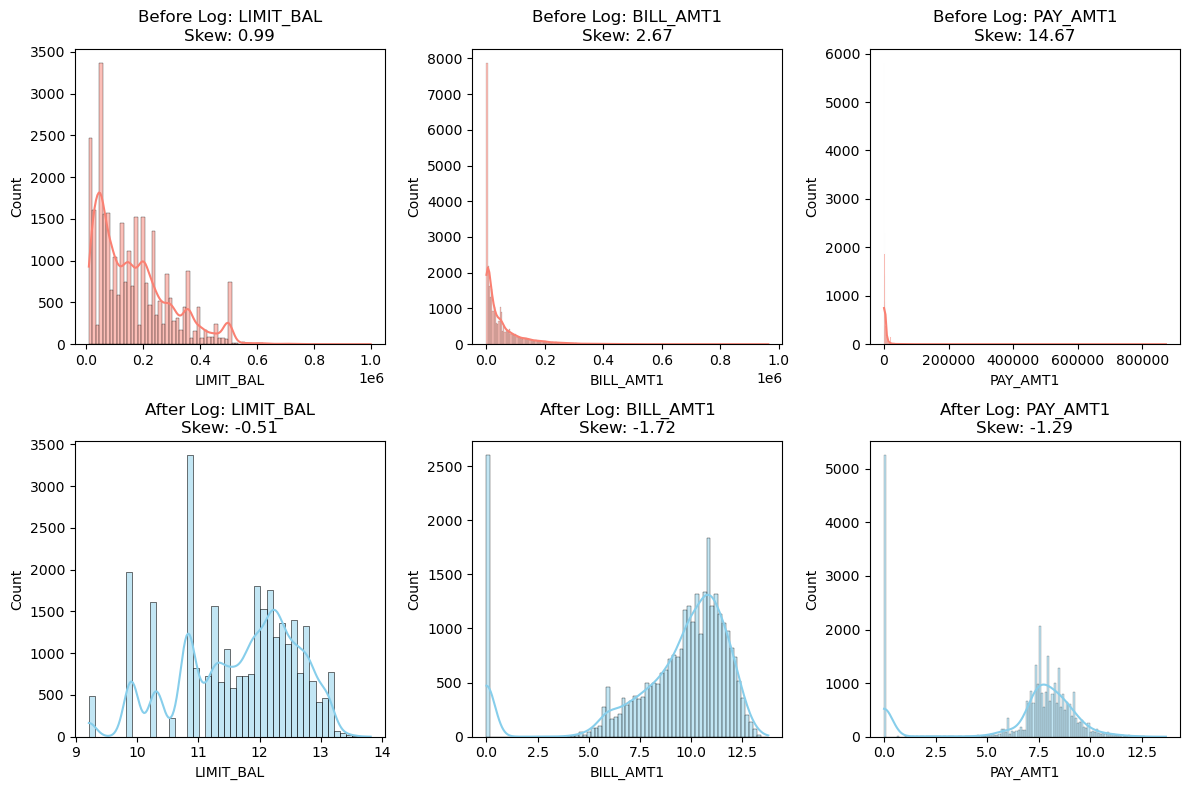

In [34]:
cols_to_check = ['LIMIT_BAL', 'BILL_AMT1', 'PAY_AMT1']  # choose any few

plt.figure(figsize=(12, 8))
for i, col in enumerate(cols_to_check):
    plt.subplot(2, 3, i+1)
    sns.histplot(df[col], kde=True, color='salmon')
    plt.title(f'Before Log: {col}\nSkew: {df[col].skew():.2f}')

    plt.subplot(2, 3, i+4)
    sns.histplot(df_log[col], kde=True, color='skyblue')
    plt.title(f'After Log: {col}\nSkew: {df_log[col].skew():.2f}')

plt.tight_layout()
plt.show()


In [35]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Scale only numeric columns
df_scaled = df.copy()
df_scaled[num_cols] = scaler.fit_transform(df_scaled[num_cols])

print("✅ Scaling completed successfully.")


✅ Scaling completed successfully.


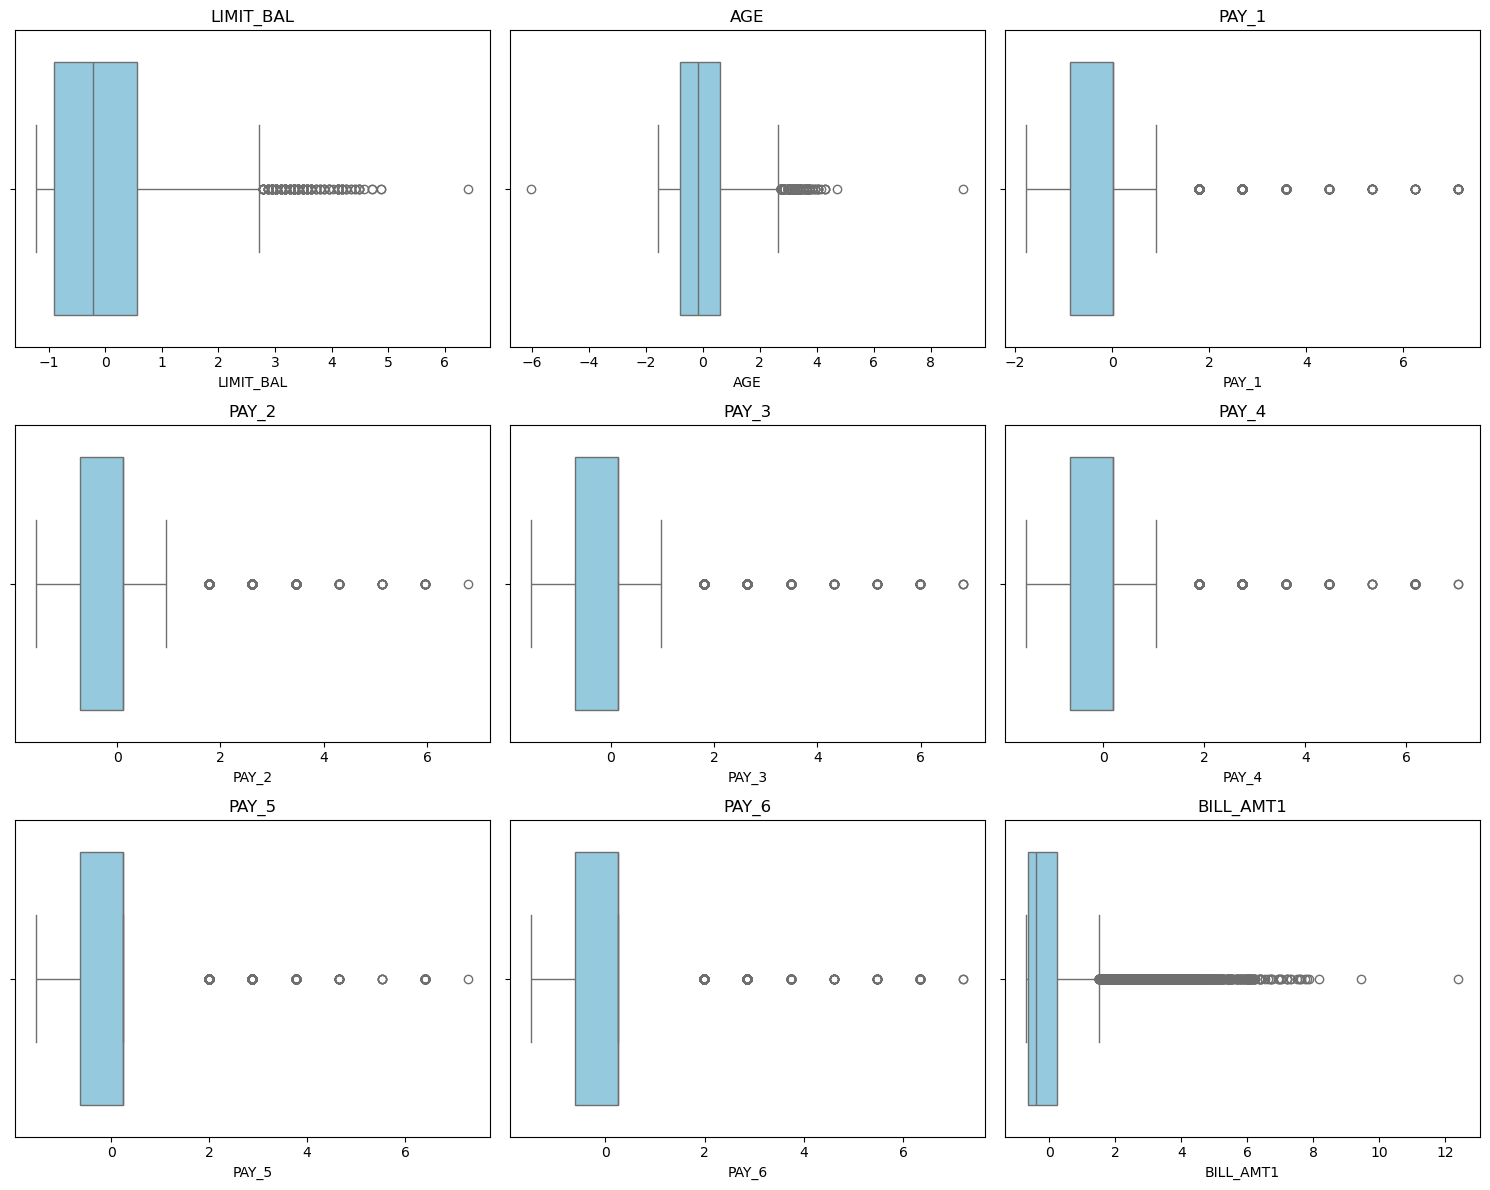

In [36]:
plt.figure(figsize=(15, 12))
for i, col in enumerate(num_cols[:9]):  # adjust number as needed
    plt.subplot(3, 3, i+1)
    sns.boxplot(x=df_scaled[col], color='skyblue')
    plt.title(col)
plt.tight_layout()
plt.show()

In [37]:
for col in num_cols:
    Q1 = df_scaled[col].quantile(0.25)
    Q3 = df_scaled[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    # Replace values outside the bounds
    df_scaled[col] = np.where(df_scaled[col] < lower, lower,
                     np.where(df_scaled[col] > upper, upper, df_scaled[col]))

print("✅ Outliers handled using IQR capping method.")

✅ Outliers handled using IQR capping method.


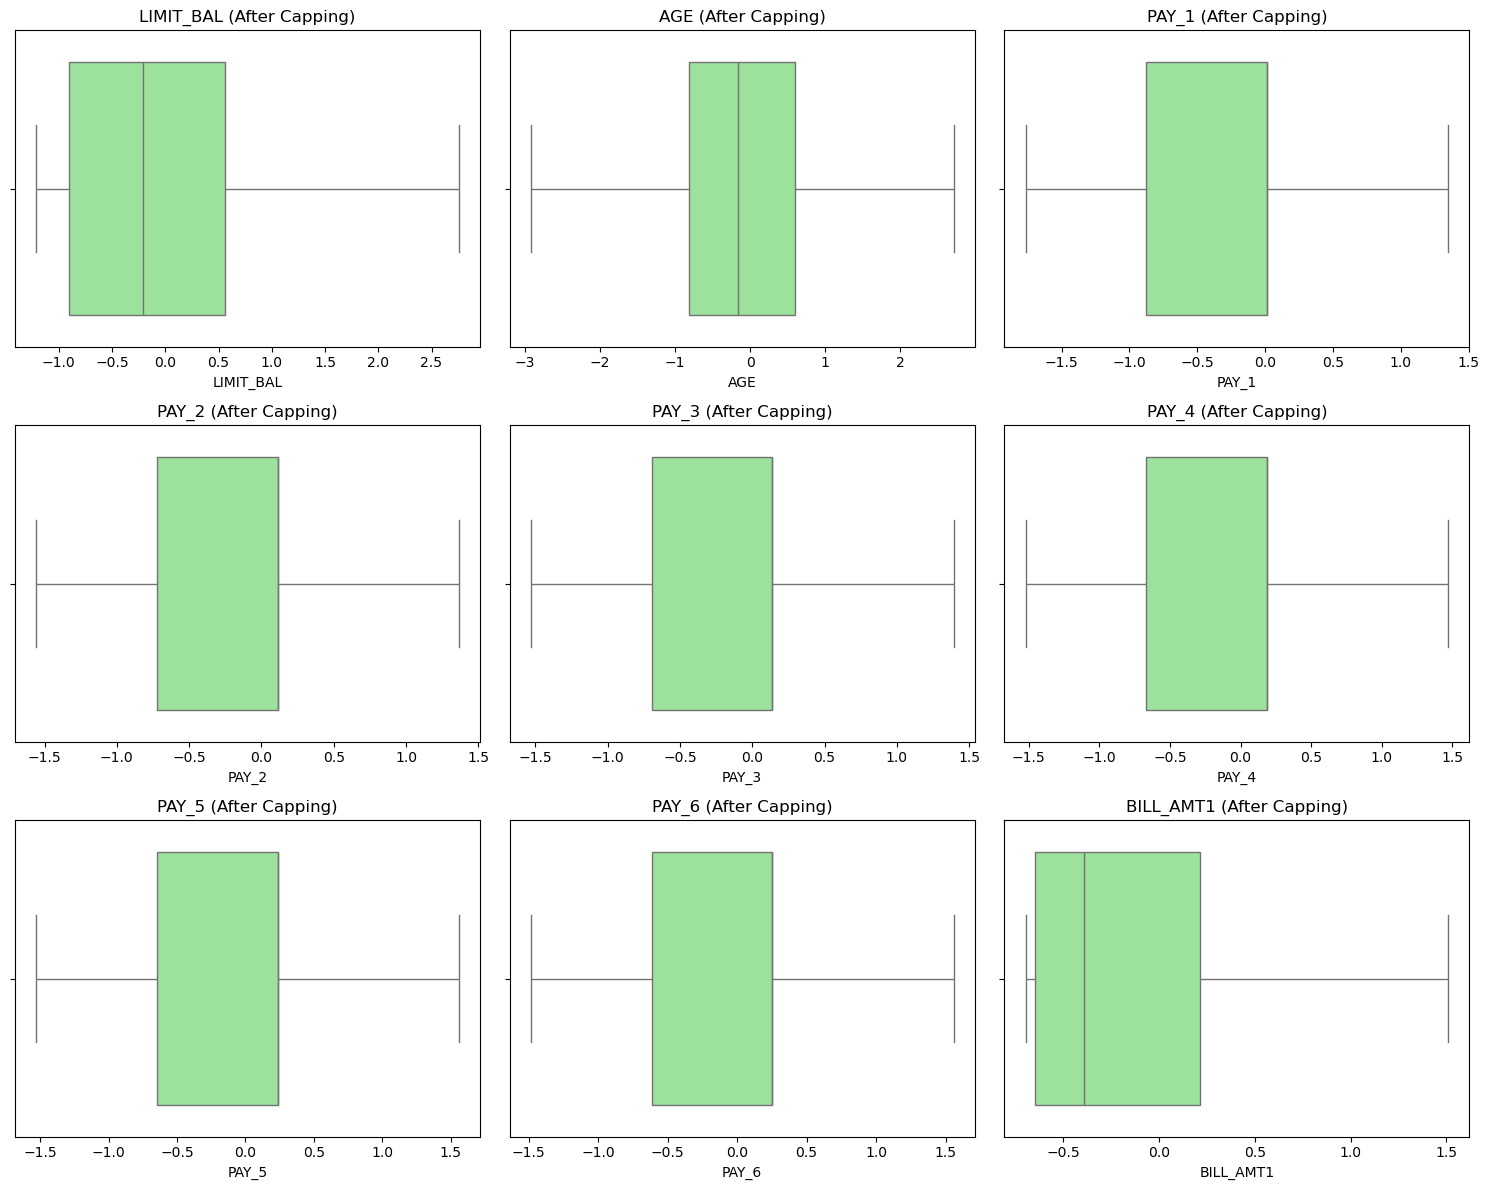

In [38]:
plt.figure(figsize=(15, 12))
for i, col in enumerate(num_cols[:9]):
    plt.subplot(3, 3, i+1)
    sns.boxplot(x=df_scaled[col], color='lightgreen')
    plt.title(f"{col} (After Capping)")
plt.tight_layout()
plt.show()


## TRAIN AND TEST SPLIT

In [39]:
X = df.drop(columns=['DEFAULT'])
y = df['DEFAULT']


In [40]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [41]:
print(X_test.shape, y_test.shape, X_train.shape, y_train.shape)


(6000, 23) (6000,) (24000, 23) (24000,)


## MODEL BUILDING

In [42]:
logreg = LogisticRegression(max_iter=1000, random_state=42)
logreg.fit(X_train, y_train)

# 3. Predict on test set
y_pred = logreg.predict(X_test)

# 4. Evaluate model
#from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print("✅ Accuracy Score:", accuracy_score(y_test, y_pred))
print("\n📊 Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\n📄 Classification Report:\n", classification_report(y_test, y_pred))

✅ Accuracy Score: 0.809

📊 Confusion Matrix:
 [[4492  181]
 [ 965  362]]

📄 Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.96      0.89      4673
           1       0.67      0.27      0.39      1327

    accuracy                           0.81      6000
   macro avg       0.74      0.62      0.64      6000
weighted avg       0.79      0.81      0.78      6000



In [43]:
from sklearn.feature_selection import SelectKBest, chi2

# 1. Ensure all features are non-negative (Chi-square works only with positive values)
X_chi = X.copy()
X_chi = X_chi.clip(lower=0)

# 2. Apply Chi-Square test
chi_selector = SelectKBest(score_func=chi2, k='all')  # You can also set k=10 for top 10
chi_selector.fit(X_chi, y)

# 3. Create DataFrame to view results
chi_scores = pd.DataFrame({
    'Feature': X.columns,
    'Chi2 Score': chi_selector.scores_,
    'P-value': chi_selector.pvalues_
}).sort_values(by='Chi2 Score', ascending=False)

# 4. Display top features
print("🔝 Top features based on Chi-square test:")
print(chi_scores.head(10))


🔝 Top features based on Chi-square test:
      Feature    Chi2 Score  P-value
0   LIMIT_BAL  7.106584e+07      0.0
18   PAY_AMT2  9.229476e+06      0.0
17   PAY_AMT1  7.728847e+06      0.0
19   PAY_AMT3  5.630969e+06      0.0
22   PAY_AMT6  5.141638e+06      0.0
20   PAY_AMT4  4.926667e+06      0.0
21   PAY_AMT5  4.433484e+06      0.0
11  BILL_AMT1  1.239053e+06      0.0
12  BILL_AMT2  6.295760e+05      0.0
13  BILL_AMT3  6.039238e+05      0.0


* Customers with higher credit limits are less likely to default.
* Customers who consistently make higher payments or pay on time across the months are less likely to default.
* This means that customers carrying larger unpaid balances from month to month tend to struggle with repayments and thus are more likely to default.

In [44]:
# Import Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Create and train the model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predict on test data
y_pred_rf = rf.predict(X_test)

# Evaluate performance
print("✅ Accuracy Score:", accuracy_score(y_test, y_pred_rf))
print("\n📊 Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("\n📄 Classification Report:\n", classification_report(y_test, y_pred_rf))


✅ Accuracy Score: 0.8125

📊 Confusion Matrix:
 [[4394  279]
 [ 846  481]]

📄 Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.94      0.89      4673
           1       0.63      0.36      0.46      1327

    accuracy                           0.81      6000
   macro avg       0.74      0.65      0.67      6000
weighted avg       0.79      0.81      0.79      6000



In [45]:
# 1️⃣ Import libraries
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# 2️⃣ Initialize XGBoost model
xgb = XGBClassifier(
    n_estimators=200,        # number of trees
    learning_rate=0.1,       # step size
    max_depth=5,             # tree depth
    subsample=0.8,           # fraction of samples per tree
    colsample_bytree=0.8,    # fraction of features per tree
    random_state=42,
    use_label_encoder=False, # avoid warnings
    eval_metric='logloss'    # metric to optimize
)

# 3️⃣ Train the model
xgb.fit(X_train, y_train)

# 4️⃣ Make predictions
y_pred_xgb = xgb.predict(X_test)

# 5️⃣ Evaluate performance
print("✅ Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("\n📊 Confusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))
print("\n📄 Classification Report:\n", classification_report(y_test, y_pred_xgb))


✅ Accuracy: 0.8163333333333334

📊 Confusion Matrix:
 [[4412  261]
 [ 841  486]]

📄 Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.94      0.89      4673
           1       0.65      0.37      0.47      1327

    accuracy                           0.82      6000
   macro avg       0.75      0.66      0.68      6000
weighted avg       0.80      0.82      0.80      6000



# Hyperparameter Tuning with GridSearchCV

In [46]:
param_grid = {
    'n_estimators': [65,67,70,72],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.1, 0.09, 0.08]
   }

In [47]:
from sklearn.model_selection import GridSearchCV

grid = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1)

In [48]:
grid.fit(X_train, y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=0.8, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='logloss', feature_types=None,
                                     feature_weights=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=5,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=200,
                                     n_jobs=None, num_parallel_tree=None, ...),
             param_grid={'learning_rate': [0.1, 0.09, 0.08],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [65, 67, 70, 72]},
             scoring='accuracy', verbose=1)

In [49]:
best_model = grid.best_estimator_

In [50]:
print("Best Parameters:", grid.best_params_)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Best Parameters: {'learning_rate': 0.08, 'max_depth': 3, 'n_estimators': 72}
Accuracy: 0.809
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.96      0.89      4673
           1       0.67      0.27      0.39      1327

    accuracy                           0.81      6000
   macro avg       0.74      0.62      0.64      6000
weighted avg       0.79      0.81      0.78      6000

Confusion Matrix:
 [[4492  181]
 [ 965  362]]


# Comparing the train and test accuracy

In [51]:
train_acc = accuracy_score(y_train, best_model.predict(X_train))
test_acc = accuracy_score(y_test, y_pred)

print("Train Accuracy:", train_acc)
print("Test Accuracy:", test_acc)

Train Accuracy: 0.8244583333333333
Test Accuracy: 0.809


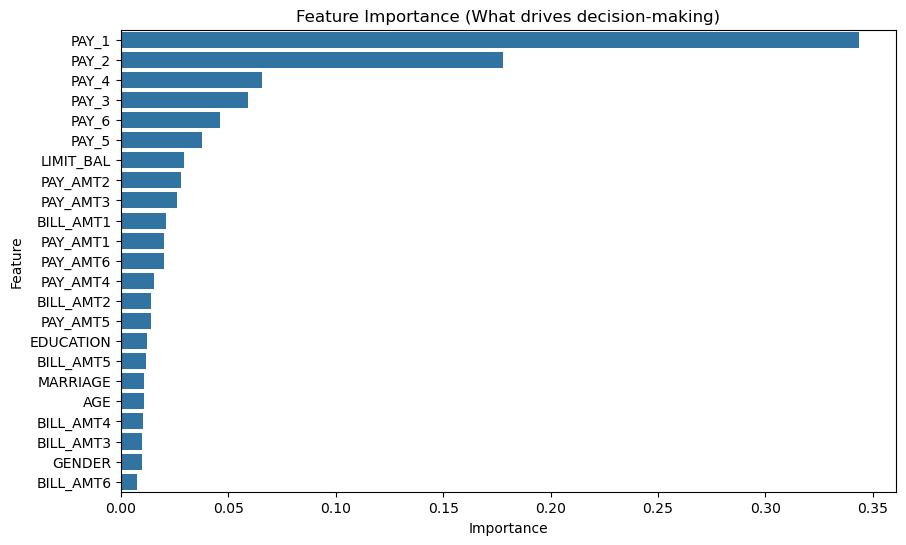

In [52]:
# Plot feature importance
importances = best_model.feature_importances_
feature_names = X_train.columns

feat_imp_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feat_imp_df = feat_imp_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=feat_imp_df)
plt.title("Feature Importance (What drives decision-making)")
plt.show()

* PAY_1 and PAY_2 (repayment status for the last two months) are the most influential features, meaning a customer’s recent payment behavior is the strongest signal of future default.

* PAY_3, PAY_4, PAY_5, and PAY_6 also contribute significantly, showing that the longer payment patterns matter, but less than the most recent ones.

* LIMIT_BAL (credit limit) and PAY_AMT variables (past payment amounts) play a moderate role, suggesting that customers with higher limits and consistent payments are less likely to default.

* Demographic features such as EDUCATION, MARRIAGE, and AGE have relatively low importance, indicating that behavioral and financial data are much more predictive than personal attributes.

In [53]:
## ✅ 2. Model Accuracy (How well does it predict?)
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2%}")

Model Accuracy: 80.90%
